In [1]:
# 1hour, 8hours, 23hours with all K joining rates_grouped by time

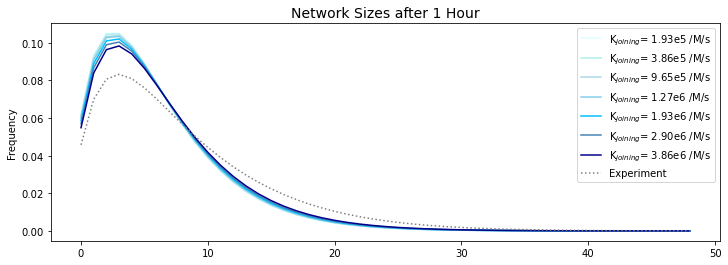

In [38]:
#1 hour
import numpy as np
import matplotlib.pyplot as plt

#### Replace with your actual file paths ####
base_path = '...'
ext = '_50iters_to50seeds_simdata.txt'

# List of combinations for different factors
combinations = [
    (1, 0.05, '1.93e5'),
    (1, 0.1,  '3.86e5'),
    (1, 0.25, '9.65e5'),
    (1, 0.33, '1.27e6'),
    (1, 0.5,  '1.93e6'),
    (1, 0.75, '2.90e6'),
    (1, 1,    '3.86e6')
]

data_files = [base_path + str(hrs) + 'hr_kjoinfact_' + str(k_join_fact) + ext for hrs, k_join_fact, k_joining_rate in combinations]

data_labels = [f'K$_{{\t{{joining}}}}$= {k_joining_rate} /M/s' for hrs, k_join_fact, k_joining_rate in combinations]

# data_colors = ['#2ca02c', '#9877e3', '#de8992', '#a29ebc', '#8e9fda', '#dac98e', '#8ec5da']
data_colors = ['lightcyan', 'paleturquoise',  'lightblue', 'skyblue', 'deepskyblue', 'steelblue','darkblue']

data_linestyles = ['solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid']

# Read data from files using NumPy
exp_list = np.loadtxt('...')'

# Create a range of x-values
possible_seeds_range = np.arange(len(exp_list))

# Set the figure size
plt.figure(figsize=(12, 4)) 

# Plot simulation data using a loop
for data_file, label, color, linestyle in zip(data_files, data_labels, data_colors, data_linestyles):
    sim_list = np.loadtxt(data_file)
    plt.plot(possible_seeds_range, sim_list, color=color, linestyle = linestyle, label=label)

# Plot experimental data
plt.plot(possible_seeds_range, exp_list, color='#7f7f7f', label='Experiment', linestyle = 'dotted')

# Customize labels and title
plt.title('Network Sizes after 1 Hour',fontsize = 14)
# plt.xlabel('Network Size (Number of Seeds)',fontsize = 14) 
plt.ylabel('Frequency') 
plt.legend(fontsize = 10)

# Show the plot
plt.savefig('1hour_grouped.png')
plt.show()


No handles with labels found to put in legend.


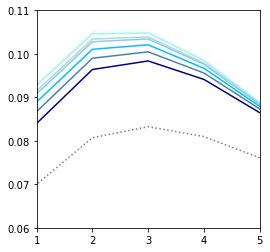

In [23]:
# 1 hour_zoomed in
import numpy as np
import matplotlib.pyplot as plt

#### Replace with your actual file paths ####
base_path = '...'
ext = '_50iters_to50seeds_simdata.txt'

# List of combinations for different factors
combinations = [
    (1, 0.05),
    (1, 0.1),
    (1, 0.25),
    (1, 0.33),
    (1, 0.5),
    (1, 0.75),
    (1, 1)
]

data_files = [base_path + str(hrs) + 'hr_kjoinfact_' + str(k_join_fact) + ext for hrs, k_join_fact in combinations]

data_labels = [f'Simulation_factor{k_join_fact}' for hrs, k_join_fact in combinations]

data_colors = ['lightcyan', 'paleturquoise',  'lightblue', 'skyblue', 'deepskyblue', 'steelblue','darkblue']

data_linestyles = ['solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid']

# Read data from files using NumPy
exp_list = np.loadtxt('...')'

# Create a range of x-values
possible_seeds_range = np.arange(len(exp_list))

# Create a square-sized figure
fig, ax = plt.subplots(figsize=(4, 4))

# Plot simulation data using a loop
for data_file, color, linestyle in zip(data_files, data_colors, data_linestyles):
    sim_list = np.loadtxt(data_file)
    ax.plot(possible_seeds_range, sim_list, color=color, linestyle=linestyle)

# Plot experimental data
ax.plot(possible_seeds_range, exp_list, color='#7f7f7f', linestyle = 'dotted')

# # Customize labels and title
# ax.set_title('1 Hour, K_join from 0.05 to 1')
# ax.set_xlabel('Seed Counts')
# ax.set_ylabel('Normalized Densities')

# Set x-axis limits to zoom in from x=4 to 5
ax.set_xlim(1, 5)
ax.set_ylim(0.06, 0.11)

# Remove legends
ax.legend().set_visible(False)

# Show the plot
plt.savefig('1hour_grouped_zoom.png')
plt.show()


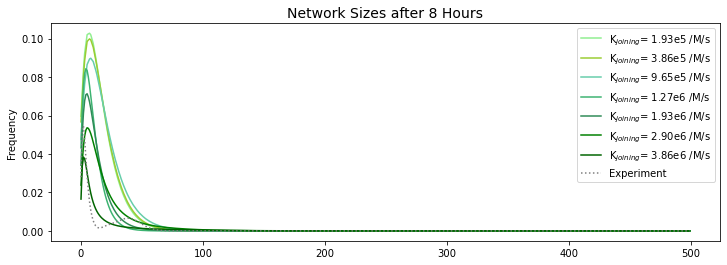

In [34]:
# 8 hours
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#### Replace with your actual file paths ####
base_path = '...'

ext_1 = '_50iters_to'
ext_2 = 'seeds_simdata.txt'

# List of combinations for different factors
combinations = [
    (8, 0.05, 200,'1.93e5'),
    (8, 0.1,  200,'3.86e5'),
    (8, 0.25, 200,'9.65e5'),
    (8, 0.33, 400,'1.27e6'),
    (8, 0.5,  400,'1.93e6'),
    (8, 0.75, 400,'2.90e6'),
    (8, 1,   1000,'3.86e6')
]

# Generate data file paths using string formatting
data_files = [f"{base_path}{hrs}hr_kjoinfact_{k_join_fact}{ext_1}{seeds}{ext_2}" for hrs, k_join_fact, seeds, k_joining_rate in combinations]

data_labels = [f'K$_{{\t{{joining}}}}$= {k_joining_rate} /M/s' for hrs, k_join_fact, seeds, k_joining_rate in combinations]

data_colors = ['lightgreen',  'yellowgreen', 'mediumaquamarine', 'mediumseagreen', 'seagreen', 'green', 'darkgreen']

data_linestyles = ['solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid']

# Read data from files using NumPy
exp_list = np.loadtxt('...')'

# Determine the maximum length among all data sets
max_length = 500

# Create a common range of x-values
possible_seeds_range = np.arange(max_length)

# Lists to store interpolated data
interpolated_sim_data = []

# Interpolate simulation data to have the same length as the common x-values
for data_file in data_files:
    sim_data = np.loadtxt(data_file)
    interp_func = interp1d(np.linspace(0, 1, len(sim_data)), sim_data)
    interpolated_sim_data.append(interp_func(np.linspace(0, 1, max_length)))
    
# Set the figure size
plt.figure(figsize=(12, 4)) 

# Plot interpolated simulation data using a loop
for sim_data, label, color, linestyle in zip(interpolated_sim_data, data_labels, data_colors, data_linestyles):
    plt.plot(possible_seeds_range, sim_data, linestyle = linestyle, color = color, label = label)


# Interpolate experimental data to have the same length as the common x-values
interp_func_exp = interp1d(np.linspace(0, 1, len(exp_list)), exp_list)
interpolated_exp_data = interp_func_exp(np.linspace(0, 1, max_length))

# Plot interpolated experimental data
plt.plot(possible_seeds_range, interpolated_exp_data, color='#7f7f7f', label='Experiment', linestyle = 'dotted')

# Customize labels and title
plt.title('Network Sizes after 8 Hours',fontsize = 14)
# plt.xlabel('Network Size (Number of Seeds)',fontsize = 14) 
plt.ylabel('Frequency') 
plt.legend(fontsize = 10)

# Show the plot
plt.savefig('8hours_grouped.png')
plt.show()

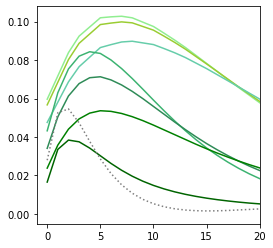

In [8]:
#8 hours_zoomed in
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#### Replace with your actual file paths ####
base_path = '...'
ext_1 = '_50iters_to'
ext_2 = 'seeds_simdata.txt'

# List of combinations for different factors
combinations = [
    (8, 0.05, 200),
    (8, 0.1, 200),
    (8, 0.25, 200),
    (8, 0.33, 400),
    (8, 0.5, 400),
    (8, 0.75, 400),
    (8, 1, 1000)
]

# Generate data file paths using string formatting
data_files = [f"{base_path}{hrs}hr_kjoinfact_{k_join_fact}{ext_1}{seeds}{ext_2}" for hrs, k_join_fact, seeds in combinations]

data_labels = [f'Simulation_factor{k_join_fact}' for hrs, k_join_fact, seeds in combinations]

data_colors = ['lightgreen',  'yellowgreen', 'mediumaquamarine', 'mediumseagreen', 'seagreen', 'green', 'darkgreen']

data_linestyles = ['solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid']

# Read data from files using NumPy
exp_list = np.loadtxt('...')'

# Determine the maximum length among all data sets
max_length = 500

# Create a common range of x-values
possible_seeds_range = np.arange(max_length)

# Lists to store interpolated data
interpolated_sim_data = []

# Interpolate simulation data to have the same length as the common x-values
for data_file in data_files:
    sim_data = np.loadtxt(data_file)
    interp_func = interp1d(np.linspace(0, 1, len(sim_data)), sim_data)
    interpolated_sim_data.append(interp_func(np.linspace(0, 1, max_length)))
    
# Set the figure size
plt.figure(figsize=(4, 4)) 

# Create a subplot 'ax' for the plot
ax = plt.subplot(111)

# Plot interpolated simulation data using a loop
for sim_data, color, linestyle in zip(interpolated_sim_data, data_colors, data_linestyles):
    ax.plot(possible_seeds_range, sim_data, linestyle=linestyle, color=color, label=label)

# Interpolate experimental data to have the same length as the common x-values
interp_func_exp = interp1d(np.linspace(0, 1, len(exp_list)), exp_list)
interpolated_exp_data = interp_func_exp(np.linspace(0, 1, max_length))

# Plot interpolated experimental data
ax.plot(possible_seeds_range, interpolated_exp_data, color='#7f7f7f', label='Experiment', linestyle = 'dotted')

# Set x-axis limits to zoom in from x=1 to 50
ax.set_xlim(-1, 20)

# # Customize labels and title
# ax.set_title('8 Hours, K_join from 0.05 to 1')
# ax.set_xlabel('Seed Counts') 
# ax.set_ylabel('Normalized Densities') 

# Remove legends
ax.legend().set_visible(False)

# Show the plot
plt.savefig('8hours_grouped_zoom.png')
plt.show()


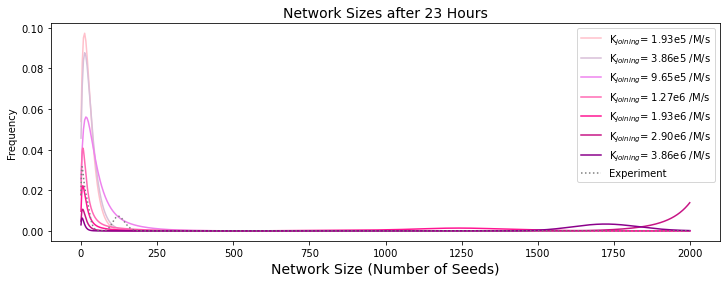

In [35]:
#23 hours
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#### Replace with your actual file paths ####
base_path = '...'
ext_1 = '_50iters_to'
ext_2 = 'seeds_simdata.txt'

# List of combinations for different factors
combinations = [
    (23, 0.05, 500,'1.93e5'),
    (23, 0.1,  500,'3.86e5'),
    (23, 0.25, 500,'9.65e5'),
    (23, 0.33,1500,'1.27e6'),
    (23, 0.5, 1500,'1.93e6'),
    (23, 0.75,1500,'2.90e6'),
    (23, 1,   2000,'3.86e6')
]

# Generate data file paths using string formatting
data_files = [f"{base_path}{hrs}hr_kjoinfact_{k_join_fact}{ext_1}{seeds}{ext_2}" for hrs, k_join_fact, seeds, k_joining_rate in combinations]

data_labels = [f'K$_{{\t{{joining}}}}$= {k_joining_rate} /M/s' for hrs, k_join_fact, seeds, k_joining_rate in combinations]

data_colors = ['pink', 'thistle', 'violet', 'hotpink','deeppink', 'mediumvioletred','darkmagenta']

data_linestyles = ['solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid']

# Read data from files using NumPy
exp_list = np.loadtxt('...')
# Determine the maximum length among all data sets
max_length = 2000

# Create a common range of x-values
possible_seeds_range = np.arange(max_length)

# Lists to store interpolated data
interpolated_sim_data = []

# Interpolate simulation data to have the same length as the common x-values
for data_file in data_files:
    sim_data = np.loadtxt(data_file)
    interp_func = interp1d(np.linspace(0, 1, len(sim_data)), sim_data)
    interpolated_sim_data.append(interp_func(np.linspace(0, 1, max_length)))
    
# Set the figure size
plt.figure(figsize=(12, 4)) 

# Plot interpolated simulation data using a loop
for sim_data, label, color, linestyle in zip(interpolated_sim_data, data_labels, data_colors, data_linestyles):
    plt.plot(possible_seeds_range, sim_data, linestyle = linestyle, color = color, label = label)


# Interpolate experimental data to have the same length as the common x-values
interp_func_exp = interp1d(np.linspace(0, 1, len(exp_list)), exp_list)
interpolated_exp_data = interp_func_exp(np.linspace(0, 1, max_length))

# Plot interpolated experimental data
plt.plot(possible_seeds_range, interpolated_exp_data, color='#7f7f7f', label='Experiment', linestyle = 'dotted')

# Customize labels and title
plt.title('Network Sizes after 23 Hours',fontsize = 14)
plt.xlabel('Network Size (Number of Seeds)',fontsize = 14) 
plt.ylabel('Frequency') 
plt.legend(fontsize = 10)
# Show the plot
plt.savefig('23hours_grouped.png')
plt.show()

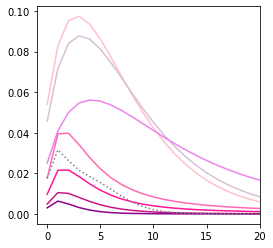

In [31]:
#23 hours_zoomed in
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#### Replace with your actual file paths ####
base_path = '...'
ext_1 = '_50iters_to'
ext_2 = 'seeds_simdata.txt'

# List of combinations for different factors
combinations = [
    (23, 0.05, 500,'1.93e5'),
    (23, 0.1,  500,'3.86e5'),
    (23, 0.25, 500,'9.65e5'),
    (23, 0.33,1500,'1.27e6'),
    (23, 0.5, 1500,'1.93e6'),
    (23, 0.75,1500,'2.90e6'),
    (23, 1,   2000,'3.86e6')
]

# Generate data file paths using string formatting
data_files = [f"{base_path}{hrs}hr_kjoinfact_{k_join_fact}{ext_1}{seeds}{ext_2}" for hrs, k_join_fact, seeds, k_joining_rate in combinations]

data_labels = [f'Simulation_factor{k_join_fact}' for hrs, k_join_fact, seeds, k_joining_rate in combinations]

data_colors = ['pink', 'thistle', 'violet', 'hotpink','deeppink', 'mediumvioletred','darkmagenta']

data_linestyles = ['solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid']

# Read data from files using NumPy
exp_list = np.loadtxt('...')'

# Determine the maximum length among all data sets
max_length = 500

# Create a common range of x-values
possible_seeds_range = np.arange(max_length)

# Lists to store interpolated data
interpolated_sim_data = []

# Interpolate simulation data to have the same length as the common x-values
for data_file in data_files:
    sim_data = np.loadtxt(data_file)
    interp_func = interp1d(np.linspace(0, 1, len(sim_data)), sim_data)
    interpolated_sim_data.append(interp_func(np.linspace(0, 1, max_length)))
    
# Set the figure size
plt.figure(figsize=(4, 4)) 

# Create a subplot 'ax' for the plot
ax = plt.subplot(111)

# Plot interpolated simulation data using a loop
for sim_data, color, linestyle in zip(interpolated_sim_data, data_colors, data_linestyles):
    ax.plot(possible_seeds_range, sim_data, linestyle=linestyle, color=color, label=label)

# Interpolate experimental data to have the same length as the common x-values
interp_func_exp = interp1d(np.linspace(0, 1, len(exp_list)), exp_list)
interpolated_exp_data = interp_func_exp(np.linspace(0, 1, max_length))

# Plot interpolated experimental data
ax.plot(possible_seeds_range, interpolated_exp_data, color='#7f7f7f', label='Experiment', linestyle = 'dotted')

# Set x-axis limits to zoom in from x=1 to 50
ax.set_xlim(-1, 20)

# # Customize labels and title
# ax.set_title('23 Hours, K_join from 0.05 to 1')
# ax.set_xlabel('Seed Counts') 
# ax.set_ylabel('Normalized Densities') 

# Remove legends
ax.legend().set_visible(False)

# Show the plot
plt.savefig('23hours_grouped_zoom.png')
plt.show()


In [ ]:
#make individual plots_7 different K joining rates for each time

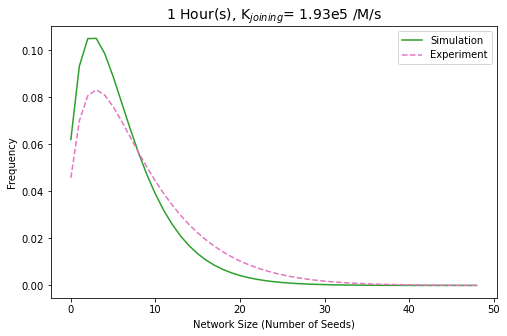

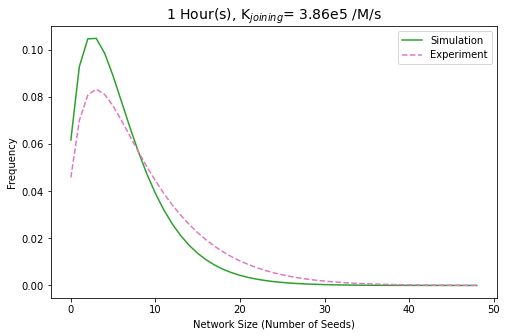

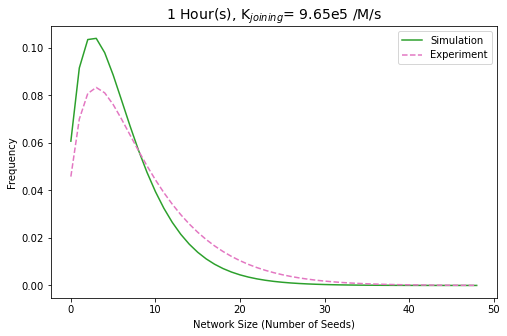

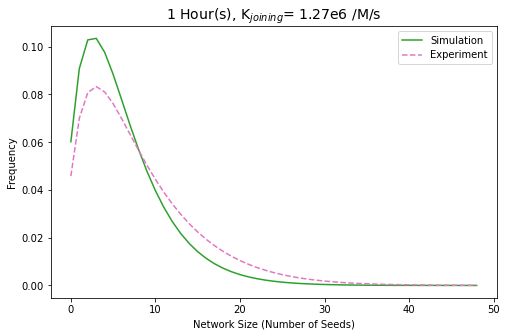

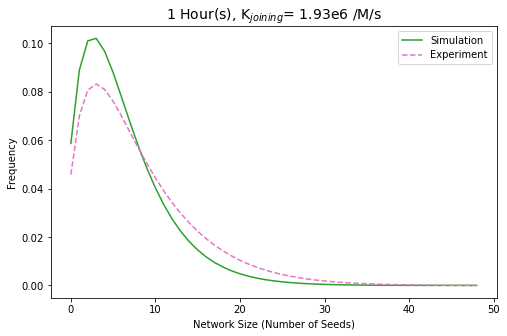

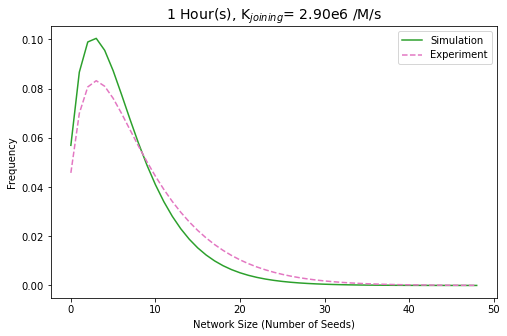

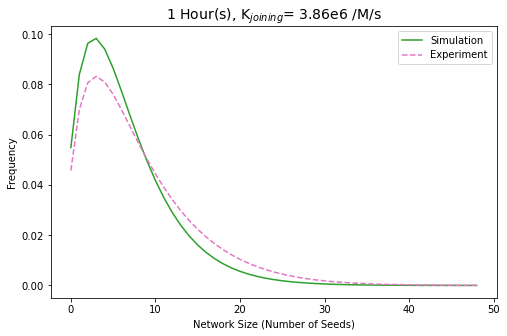

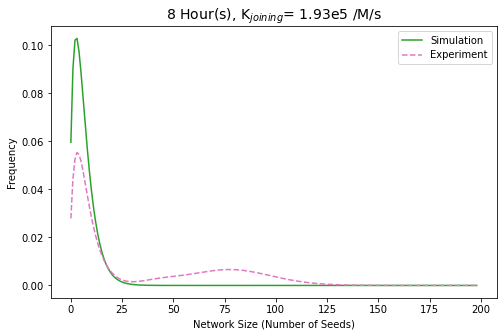

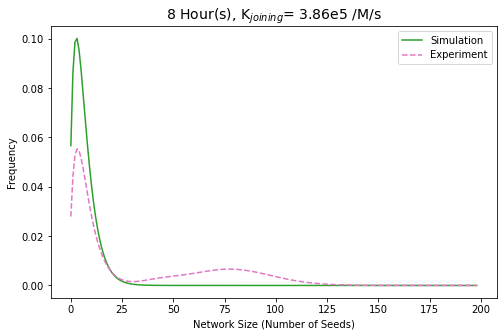

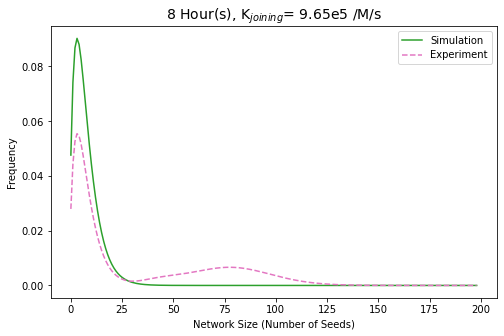

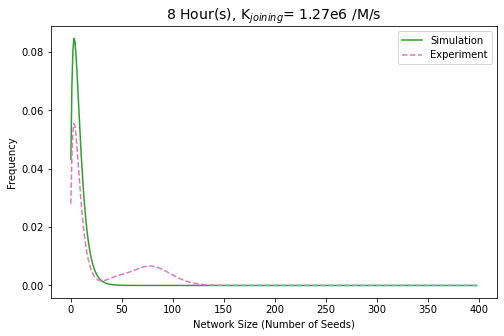

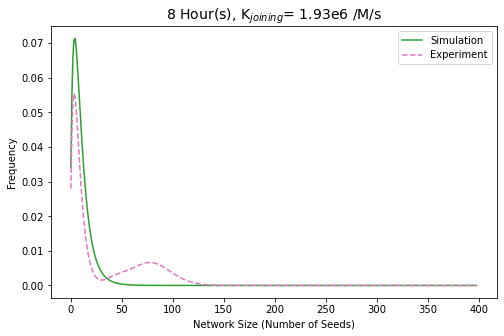

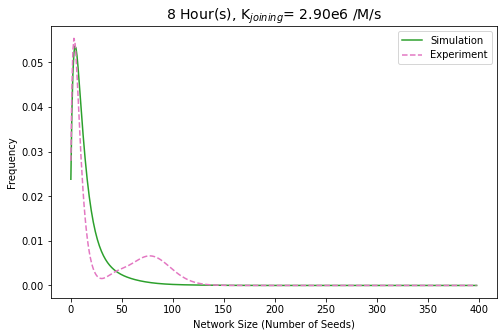

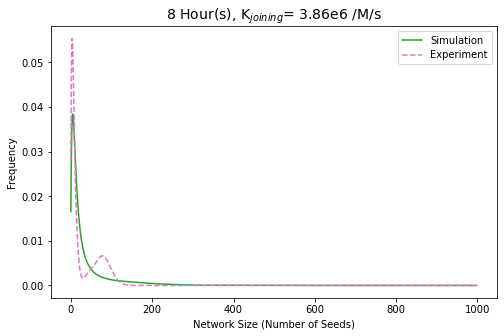

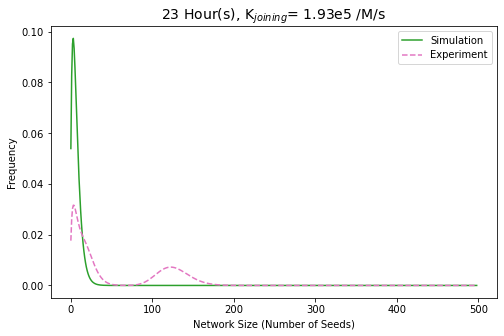

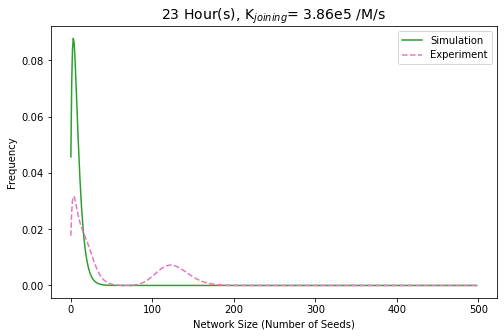

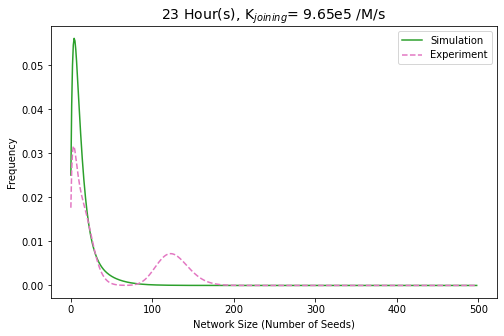

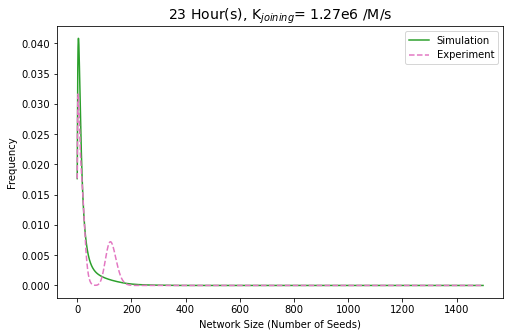

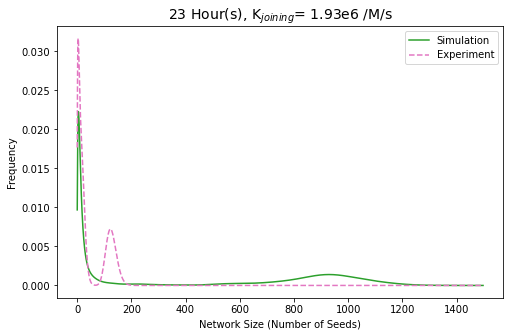

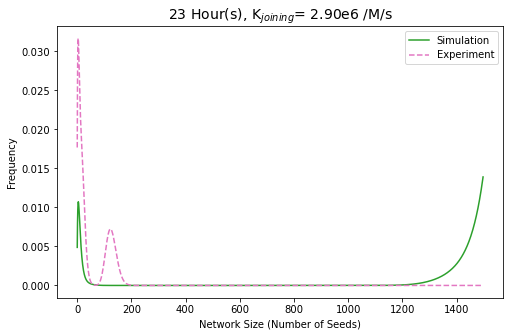

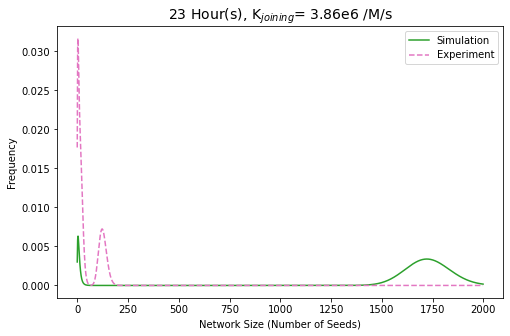

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#### Replace with your actual file paths ####
base_path = '...'
ext_1 = '_50iters_to'
ext_2 = 'seeds_simdata.txt'
ext_3 = 'seeds_expdata.txt'
combinations = [
    (1, 0.05,    50, '1.93e5'),
    (1, 0.1,     50, '3.86e5'),
    (1, 0.25,    50, '9.65e5'),
    (1, 0.33,    50, '1.27e6'),
    (1, 0.5,     50, '1.93e6'),
    (1, 0.75,    50, '2.90e6'),
    (1, 1,       50, '3.86e6'),
    (8, 0.05,   200, '1.93e5'),
    (8, 0.1,    200, '3.86e5'),
    (8, 0.25,   200, '9.65e5'),
    (8, 0.33,   400, '1.27e6'),
    (8, 0.5,    400, '1.93e6'),
    (8, 0.75,   400, '2.90e6'),
    (8, 1,     1000, '3.86e6'),
    (23, 0.05,  500, '1.93e5'),
    (23, 0.1,   500, '3.86e5'),
    (23, 0.25,  500, '9.65e5'),
    (23, 0.33, 1500, '1.27e6'),
    (23, 0.5,  1500, '1.93e6'),
    (23, 0.75, 1500, '2.90e6'),
    (23, 1,    2000, '3.86e6')
]

# Loop through combinations and create separate plots
for hrs, k_join_fact, shown_seeds, k_joining_rate in combinations:
    data_file = f"{base_path}{hrs}hr_kjoinfact_{k_join_fact}{ext_1}{shown_seeds}{ext_2}"
    data_label = f'Simulation_factor{k_joining_rate}'
    
    # Load experimental data based on hrs
#     exp_seeds = 50 if hrs == 1 else 1000 if hrs == 8 else 2000
    exp_list = np.loadtxt(f"{base_path}{hrs}hr_kjoinfact_{k_join_fact}{ext_1}{shown_seeds}{ext_3}")
    
    # Read simulation data
    sim_data = np.loadtxt(data_file)
    
#     # Interpolate simulation data to match experimental data length
#     interp_func = interp1d(np.linspace(0, 1, len(sim_data)), sim_data)
#     interpolated_sim_data = interp_func(np.linspace(0, 1, len(exp_list)))

    # Set up the figure
    plt.figure(figsize=(8, 5))
    
    # Plot simulation data
    plt.plot(np.arange(len(exp_list)), sim_data, label='Simulation', linestyle='solid', color='#2ca02c')
    
    # Plot experimental data
    plt.plot(np.arange(len(exp_list)), exp_list, label='Experiment', linestyle='dashed', color='#e377c2')

    # Customize labels and title
    plt.title(f'{hrs} Hour(s), K$_{{\t{{joining}}}}$= {k_joining_rate} /M/s',fontsize = 14)
    plt.xlabel('Network Size (Number of Seeds)')
    plt.ylabel('Frequency')
    plt.legend(fontsize = 10)
    
    # Save the plot as an image file
    plt.savefig(f'{hrs}hr_{k_join_fact}_plot.png')
    
    # Show the plot
    plt.show()
